# Colby Snoke

## 10/17/2022

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
import statistics as stats
import numpy as np

In [122]:
#read in cleaned entry survey
entry_survey = "Best Colby Snoke Project 2 - Entry Survey.csv"
es = pd.read_csv(entry_survey, parse_dates=True)

In [123]:
#read in literacy survey
literacy_survey = "Best Colby Snoke Project 2 - Literacy Survey.csv"
ls = pd.read_csv(literacy_survey, parse_dates=True)

In [124]:
es.tail()

,Unnamed: 0,timestamp,course,degree_enrollment,gender,race_ethnicity,age
540,242,2021/10/22 7:36:54 PM EST,CMP 131 Fundamentals of Programming (Python),Computer Science,Woman,White/Caucasian,18 and younger
541,243,2021/12/17 10:13:34 AM EST,CMP 130 Intro to IT,Information Technology,Man,White/Caucasian,35-64
542,244,2021/12/17 1:11:40 PM EST,CMP 128 Computer Science I,Computer Science,Man,White/Caucasian,18 and younger
543,245,NaN,245,NaN,NaN,NaN,NaN
544,246,NaN,5,NaN,NaN,NaN,NaN


In [125]:
subset_es = es[[ "course", "degree_enrollment", "gender", "race_ethnicity", "age"]]
subset_es

,course,degree_enrollment,gender,race_ethnicity,age
0,CMP 239 Internet & Web Page Design,Science,Man,Black/African American,21-24
1,CMP 239 Internet & Web Page Design,Science,Woman,Multi-Racial,25-34
2,CMP 239 Internet & Web Page Design,Science,Man,Hispanic or Latino,35-64
3,CMP 239 Internet & Web Page Design,Non Degree seeking,Woman,Asian,18 and younger
4,CMP 239 Internet & Web Page Design,Science,Man,White/Caucasian,25-34
...,...,...,...,...,...
540,CMP 131 Fundamentals of Programming (Python),Computer Science,Woman,White/Caucasian,18 and younger
541,CMP 130 Intro to IT,Information Technology,Man,White/Caucasian,35-64
542,CMP 128 Computer Science I,Computer Science,Man,White/Caucasian,18 and younger
543,245,NaN,NaN,NaN,NaN


In [126]:
ls.tail()

,Unnamed: 0,timestamp,course,degree_enrollment,gender,race_ethnicity,age
323,121,2021/11/26 10:47:11 AM EST,CMP 135 Computer Concepts with Applications,Radiography,Woman,White/Caucasian,21-24
324,122,NaN,NaN,NaN,NaN,NaN,NaN
325,123,NaN,NaN,NaN,NaN,NaN,NaN
326,124,NaN,NaN,NaN,NaN,NaN,NaN
327,125,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
subset_ls = ls[["course", "degree_enrollment", "gender", "race_ethnicity", "age"]]
subset_ls

,course,degree_enrollment,gender,race_ethnicity,age
0,CMP 135 Computer Concepts with Applications,Criminal Justice,Woman,White/Caucasian,35-64
1,CMP 126 Computer Technology and Applications,Biology,Woman,White/Caucasian,25-34
2,CMP 101 Computer Information Literacy,Biology,Woman,White/Caucasian,21-24
3,CMP 135 Computer Concepts with Applications,Criminal Justice,Woman,White/Caucasian,21-24
4,CMP 101 Computer Information Literacy,Biology,Woman,White/Caucasian,21-24
...,...,...,...,...,...
323,CMP 135 Computer Concepts with Applications,Radiography,Woman,White/Caucasian,21-24
324,NaN,NaN,NaN,NaN,NaN
325,NaN,NaN,NaN,NaN,NaN
326,NaN,NaN,NaN,NaN,NaN


In [130]:
#concatenate both files, to determine results for entire study.
total_survey = pd.concat([subset_es, subset_ls], axis=0)
total_survey

,course,degree_enrollment,gender,race_ethnicity,age
0,CMP 239 Internet & Web Page Design,Science,Man,Black/African American,21-24
1,CMP 239 Internet & Web Page Design,Science,Woman,Multi-Racial,25-34
2,CMP 239 Internet & Web Page Design,Science,Man,Hispanic or Latino,35-64
3,CMP 239 Internet & Web Page Design,Non Degree seeking,Woman,Asian,18 and younger
4,CMP 239 Internet & Web Page Design,Science,Man,White/Caucasian,25-34
...,...,...,...,...,...
323,CMP 135 Computer Concepts with Applications,Radiography,Woman,White/Caucasian,21-24
324,NaN,NaN,NaN,NaN,NaN
325,NaN,NaN,NaN,NaN,NaN
326,NaN,NaN,NaN,NaN,NaN


# Which Age groups should be targeted more?

In [141]:
#view all possible age groups to determine labels
age_total_survey= total_survey['age'].value_counts().rename_axis('age').reset_index(name = 'amount')
age_total_survey

,age,amount
0,19-20,325
1,18 and younger,245
2,21-24,148
3,25-34,98
4,35-64,47
5,65+,4


In [142]:
my_labels = age_total_survey.age
my_values = age_total_survey.amount

Text(0, 0.5, 'Amount')

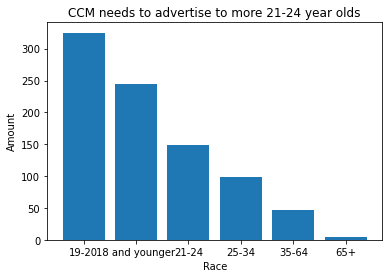

In [207]:
#create a bar chart to show which groups need to be targeted more
plt.bar(my_labels, my_values)
plt.title('CCM needs to advertise to more 21-24 year olds')
plt.xlabel('Race')
plt.ylabel('Amount')

# Should CCM target more genders?

In [174]:
#view all possible genders to create labels
gender_total_survey= total_survey['gender'].value_counts().rename_axis('gender').reset_index(name = 'amount')
gender_total_survey

,gender,amount
0,Man,531
1,Woman,307
2,Prefer not to say,21
3,Non-binary,4
4,I do not identify,3


In [200]:
#create variables
my_labels2 = gender_total_survey.gender
my_values2 = gender_total_survey.amount

Text(0, 0.5, 'Amount')

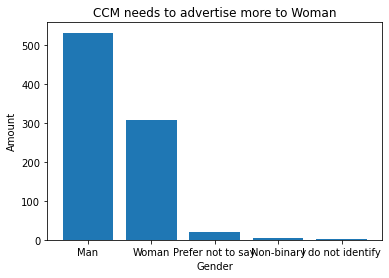

In [201]:
#create bar graph to show which genders should be targeted more. 
plt.bar(my_labels2, my_values2)
plt.title('CCM needs to advertise more to Woman')
plt.xlabel('Gender')
plt.ylabel('Amount')

# Which race is least involved in computing courses? 

In [187]:
#view all possible races to determine labels
race_total_survey = total_survey['race_ethnicity'].value_counts().rename_axis('race').reset_index(name = 'amount')
race_total_survey

,race,amount
0,White/Caucasian,442
1,Hispanic or Latino,171
2,Asian,95
3,Multi-Racial,64
4,Black/African American,45
5,Choose not to reply,45
6,American Indian/Native American/Alaska Native,5


In [189]:
#create variables
my_labels3 = race_total_survey.race
my_values3 = race_total_survey.amount

Text(0.5, 1.0, 'CCM needs to advertise to more African-Americans')

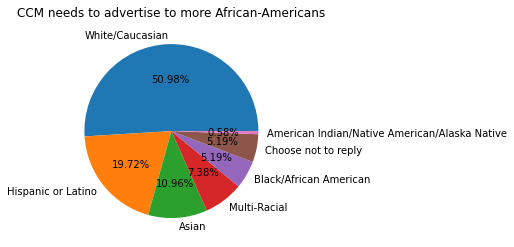

In [209]:
#Plot the different age groups to determine which groups should be targeted more. 
plt.pie(my_values3,labels=my_labels3, autopct='%1.2f%%')
plt.title('CCM needs to advertise to more African-Americans')

# Which courses should CCM advertise more?

In [177]:
#create a list that can be used for variables
course_total_survey= total_survey['course'].value_counts().rename_axis('course').reset_index(name = 'amount')
course_total_survey

,course,amount
0,CMP 128 Computer Science I,309
1,CMP 135 Computer Concepts with Applications,134
2,CMP 126 Computer Technology and Applications,131
3,CMP 131 Fundamentals of Programming (Python),85
4,CMP 101 Computer Information Literacy,59
5,CMP 239 Internet & Web Page Design,54
6,CMP 130 Intro to IT,54
7,CMP 120 Foundations of Information Security,41
8,245,1
9,5,1


In [178]:
#set variables
my_labels4 = course_total_survey.course
my_values4 = course_total_survey.amount

Text(0.5, 1.0, 'CMP 120, 130, 101 should all be advertised more')

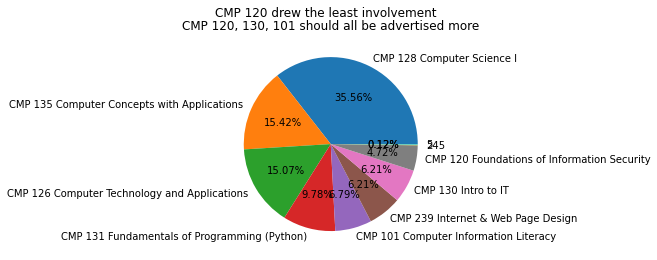

In [184]:
#create pie chart 
plt.pie(my_values4,labels=my_labels4, autopct='%1.2f%%')
plt.suptitle('CMP 120 drew the least involvement')
plt.title('CMP 120, 130, 101 should all be advertised more')

In [210]:
#download the new concatenated file
total_survey.to_csv('Colby Snoke Part 2 - Project 2 - Total Survey.csv')